Brain Tumour Detection- Data Exploration

Training Data Set

In [62]:
import os

In [63]:
dataset_dir=r'C:\Users\POORNIMA\Desktop\POORNIMA\DataScienceProjects\Final Project\brain_tumor_dataset (1)\Training'
classes=os.listdir(dataset_dir)
print("Classes found",classes)

Classes found ['glioma', 'meningioma', 'notumor', 'pituitary']


In [64]:
total_images=0
class_image_count={}
for class_name in classes:
    classpath=os.path.join(dataset_dir,class_name)
    num_images=len(os.listdir(classpath))
    total_images+=num_images
    class_image_count[class_name]=num_images
    print(f"class:{class_name},Number of images:{num_images}")
    
print("Total images in all classes:",{total_images})

class:glioma,Number of images:1321
class:meningioma,Number of images:1339
class:notumor,Number of images:1595
class:pituitary,Number of images:1457
Total images in all classes: {5712}


In [65]:
import os
import pandas as pd
from PIL import Image

image_dimension_data=[]
for class_name in classes:
    classpath=os.path.join(dataset_dir,class_name)
# Iterate through all images in the folder
    for image_name in os.listdir(classpath):
        image_path = os.path.join(classpath, image_name)
        
        # Check if it's an image file (e.g., jpg, png)
        if image_path.lower().endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif')):
            with Image.open(image_path) as img:
                # Get image dimensions
                width, height = img.size
                image_dimension_data.append({'class_name': class_name,
                    'image_name': image_name,
                    'width': width,
                    'height': height,
                    'img_dim':(width, height)
                                             
                })

image_dim_df = pd.DataFrame(image_dimension_data)
print("Total number of images in the DataFrame",len(image_dim_df))


Total number of images in the DataFrame 5712


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

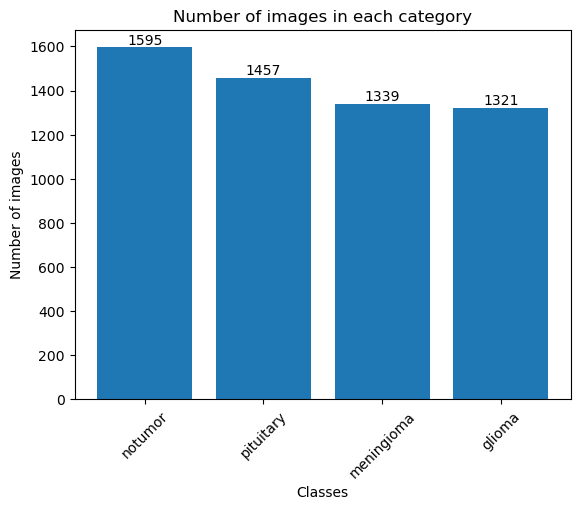

In [67]:
 
fig, ax = plt.subplots()
class_counts = image_dim_df['class_name'].value_counts()
bars = ax.bar(class_counts.index, class_counts.values)
ax.bar_label(bars)
plt.title('Number of images in each category')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

plt.show()

In [68]:
distinct_image_dim=image_dim_df['img_dim'].unique()

In [69]:
distinct_image_dim

array([(512, 512), (503, 369), (507, 362), (497, 320), (213, 237),
       (455, 500), (250, 270), (472, 546), (441, 427), (324, 284),
       (485, 510), (507, 605), (290, 339), (338, 345), (226, 212),
       (420, 264), (554, 554), (300, 258), (369, 398), (591, 650),
       (351, 398), (341, 377), (491, 624), (314, 358), (212, 237),
       (257, 307), (262, 308), (200, 223), (300, 345), (306, 306),
       (374, 370), (201, 207), (291, 340), (630, 423), (318, 354),
       (209, 225), (315, 341), (286, 356), (278, 306), (252, 303),
       (442, 442), (513, 522), (312, 401), (300, 412), (205, 251),
       (204, 249), (239, 224), (323, 342), (290, 342), (366, 395),
       (416, 395), (256, 256), (402, 396), (369, 395), (343, 367),
       (313, 393), (330, 355), (367, 395), (411, 396), (234, 216),
       (232, 261), (645, 439), (217, 232), (329, 314), (216, 216),
       (257, 248), (206, 245), (1149, 1019), (722, 690), (315, 315),
       (341, 395), (341, 372), (273, 326), (239, 248), (289,

In [70]:
len(distinct_image_dim)

382

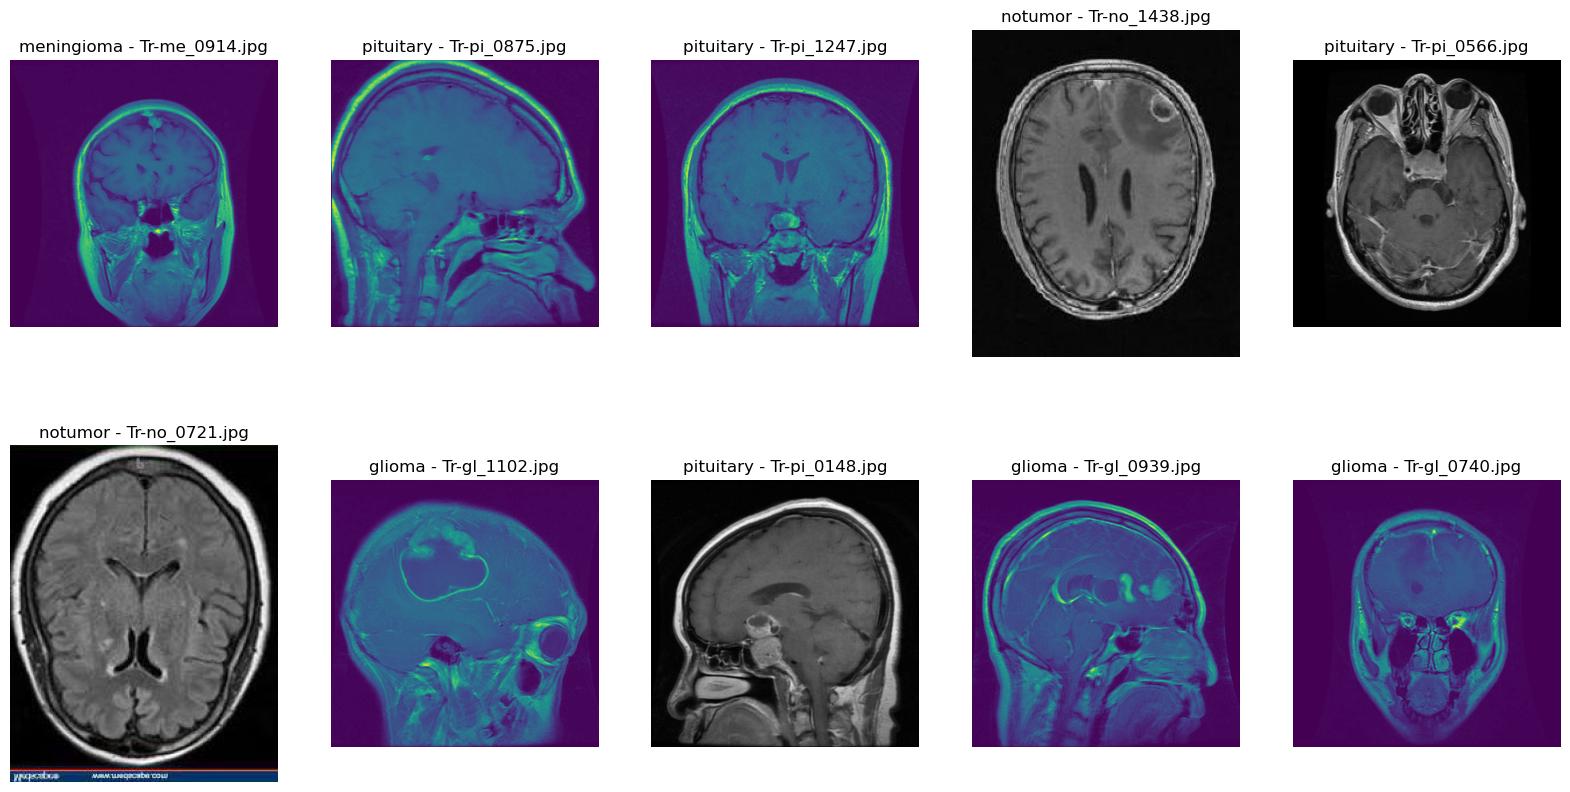

In [71]:
import matplotlib.pyplot as plt

# Sample images visualization
sample_images = image_dim_df.sample(10)  # Randomly select 5 images

plt.figure(figsize=(20, 10))
for i, (index, row) in enumerate(sample_images.iterrows()):
    image_path = os.path.join(dataset_dir, row['class_name'], row['image_name'])
    img = Image.open(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"{row['class_name']} - {row['image_name']}")
    plt.axis('off')
plt.show()
